# 🧠 Tumor Growth Modeling with ODEs

In this notebook, we simulate tumor growth using two classical mathematical models from mathematical biology:

- **Logistic Growth**
- **Gompertz Growth**

These models describe how tumor size evolves over time, accounting for biological limits such as resource constraints or immune system response. We will derive, solve, and visualize these models using Python's scientific stack.

---

## Background

In **MATH 250B** (Intro to Linear Algebra and Differential Equations), we studied the **logistic growth equation**, a nonlinear differential equation of the form:

$
\frac{dP}{dt} = rP \left(1 - \frac{P}{K}\right)
$

The **Gompertz Growth** equation is derived as:

$
\frac{dP}{dt} = rP\left(\ln(\frac{K}{P}\right))
$

Where:
- $P(t)$: Population size (or tumor size) at time $t$
- $r$: Growth rate
- $K$: Carrying capacity (maximum sustainable population size)

This same framework is widely used in **tumor growth modeling**, where \( P(t) \) represents the tumor mass or volume. We will compare it to another important model — the **Gompertz equation**, which often more accurately captures real tumor behavior at large sizes.

---


       time   logistic   gompertz
0  0.000000  10.000000  10.000000
1  0.200401  10.404687  11.983164
2  0.400802  10.825574  14.257702
3  0.601202  11.263292  16.849024
4  0.801603  11.718498  19.781519


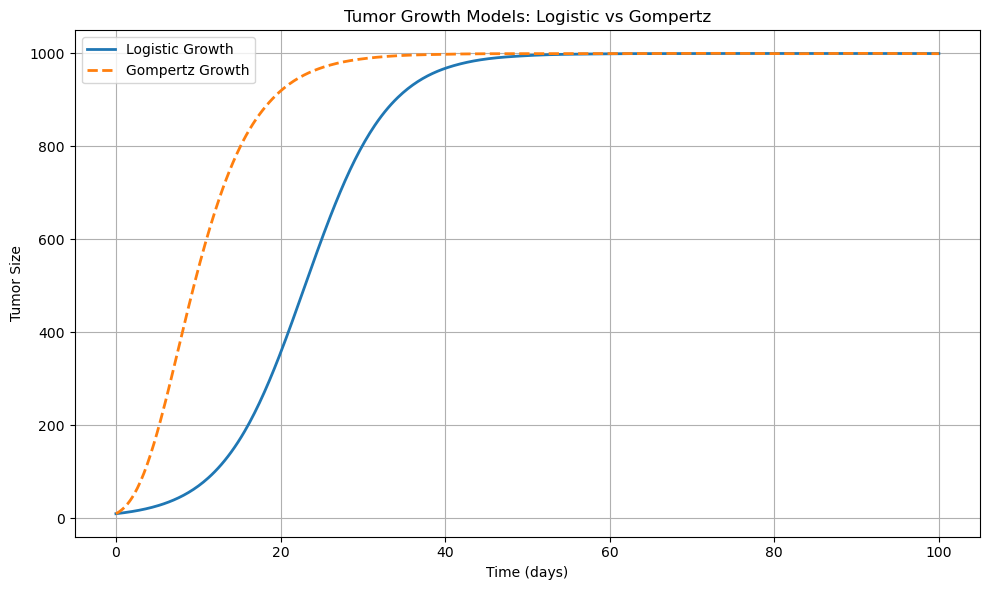

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import pandas as pd
import matplotlib.pyplot as plt

def logistic_model(t, P, r, K):
    return r*P * (1 - P/K)

def gompertz_model(t, P, r, K):
    return r*P*np.log(K/P)

#Solve IVPs numerically
r = 0.2 # Growth rate
K = 1000 # Carrying capacity
P0 = 10 # Initial tumor size

t_span = (0,100)
t_eval = np.linspace(t_span[0], t_span[1], 500)
sol_logistic = solve_ivp(logistic_model, t_span, [P0], args=(r,K), t_eval=t_eval)
sol_gompertz = solve_ivp(gompertz_model, t_span, [P0], args=(r,K), t_eval=t_eval)

# Print out first set of data points
df = pd.DataFrame({
    'time': t_eval,
    'logistic': sol_logistic.y[0],
    'gompertz': sol_gompertz.y[0],
})

print(df.head())

# Saving data
df.to_csv('simulated_growth_model.csv', columns=['time', 'logistic', 'gompertz'], index=False)


plt.figure(figsize=(10,6))
plt.plot(sol_logistic.t, sol_logistic.y[0], label='Logistic Growth', linewidth=2)
plt.plot(sol_gompertz.t, sol_gompertz.y[0], label='Gompertz Growth', linewidth=2, linestyle='--')
plt.title("Tumor Growth Models: Logistic vs Gompertz")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Size")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()